In [1]:
import random
import sys
import re

import nltk
import wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_samples, silhouette_score

## 1. Dimensionality Reduction

In [2]:
# read wine dataset from previous dataset
names = ["Wine type", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", 
         "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280", "Proline"]
df = pd.read_csv("../lab2/wine.data", index_col=False, names=names)

# normalize columns
for column in names[1:]:
    df[column] = (df[column] - df[column].mean())/df[column].std()

Y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

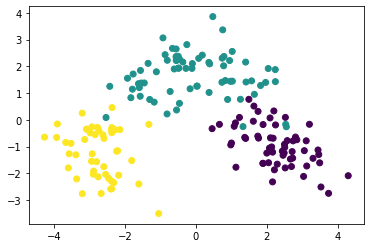

In [3]:
# reduction data to 2 axis
pca = PCA(n_components=2)
X_downsized = pca.fit_transform(X)
plt.scatter(X_downsized[:,0], X_downsized[:,1], c=Y)

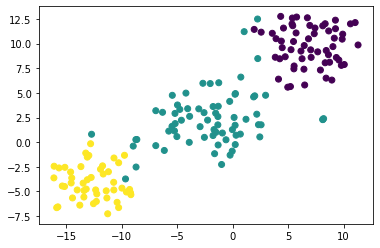

In [4]:
# reduction data to 2 axis
tsne = TSNE(n_components=2)
X_downsized = tsne.fit_transform(X)
plt.scatter(X_downsized[:,0], X_downsized[:,1], c=Y)

## 2. Cluster analysis

# A (Image quantization)

In [5]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

img_reshaped.shape (1018880, 3)


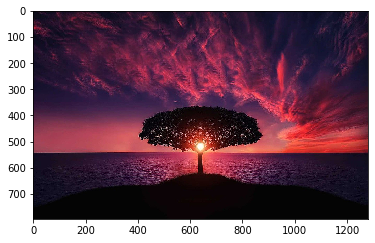

In [6]:
# read and visualize orginal image
img = Image.open("./img1.jpg")
img_arr = np.array(img) / 255
w, h, d = original_shape = tuple(img_arr.shape)
img_reshaped = np.reshape(img_arr, (w * h, d))
print("img_reshaped.shape", img_reshaped.shape)
image_array_sample = shuffle(img_reshaped, random_state=0)[:1000]
plt.imshow(img_arr)

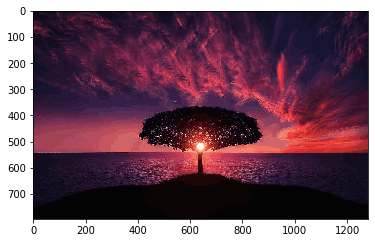

In [7]:
# visualize image with 64 colors
n_colors = 64
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(img_reshaped)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

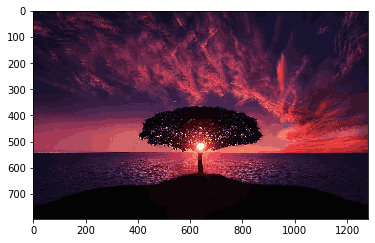

In [8]:
# visualize image with 32 colors
n_colors = 32
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(img_reshaped)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

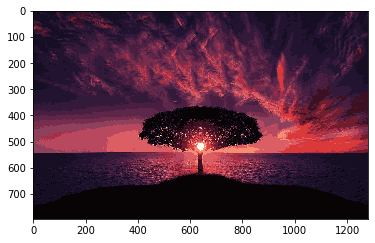

In [9]:
# visualize image with 16 colors
n_colors = 16
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(img_reshaped)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

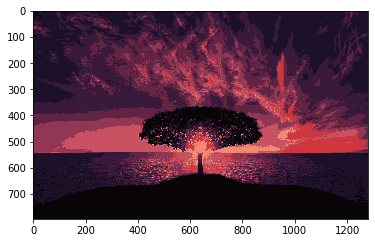

In [10]:
# visualize image with 8 colors
n_colors = 8
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(img_reshaped)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

# B (Silhouette analysis)

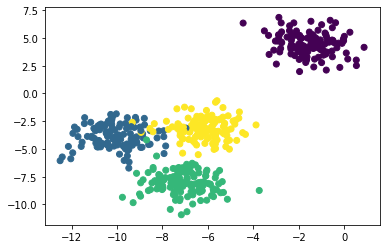

In [11]:
# generate 4 cluster
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

plt.scatter(X[:,0], X[:,1], c=Y)

0.5882004012129721


Text(0, 0.5, 'Feature space for the 2nd feature')

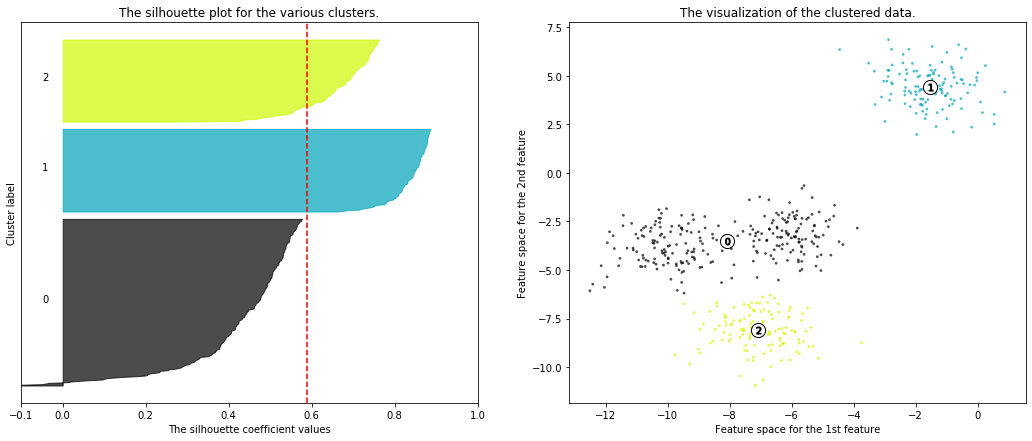

In [12]:
n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg)
 # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

0.6505186632729437


Text(0, 0.5, 'Feature space for the 2nd feature')

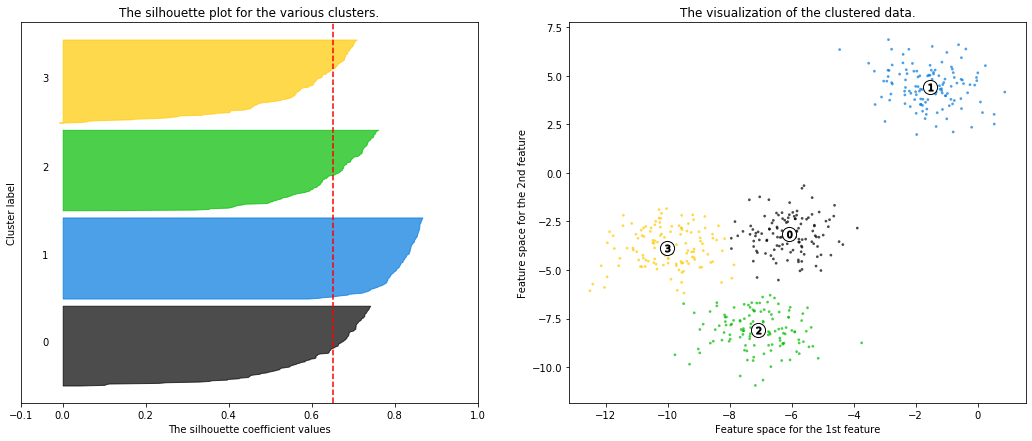

In [13]:
n_clusters = 4
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg)
 # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

0.6505186632729437


Text(0, 0.5, 'Feature space for the 2nd feature')

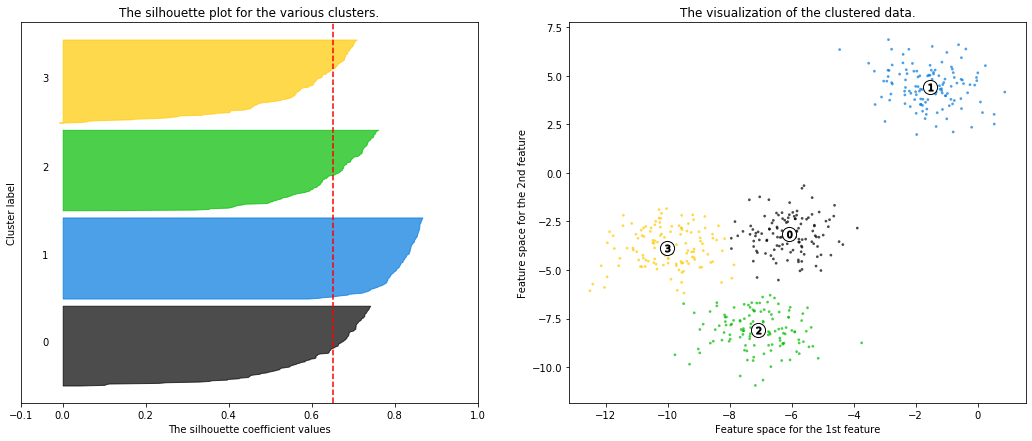

In [14]:
n_clusters = 4
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg)
 # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

# C (EM-algorithm)

(2000, 2) (2000,)


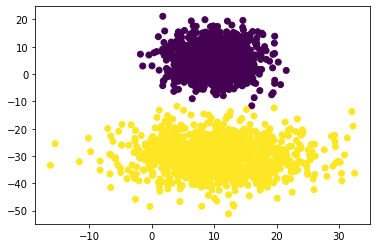

In [15]:
num_samples = 1000
means1, means2 = (10, 5), (10, -30)
cov1, cov2 = [[15, 0], [0, 30]], [[56, 0], [0, 40]]
X1 = np.random.multivariate_normal(size=(num_samples), mean=means1, cov=cov1)
X2 = np.random.multivariate_normal(size=(num_samples), mean=means2, cov=cov2)
X = np.concatenate([X1, X2])
Y = np.ones(2*num_samples)
Y[:num_samples] = 0
Y[num_samples:] = 1
indexes = np.arange(2*num_samples)
random.shuffle(indexes)
X, Y = X[indexes], Y[indexes]
print(X.shape, Y.shape)
plt.scatter(X[:,0], X[:,1], c=Y)

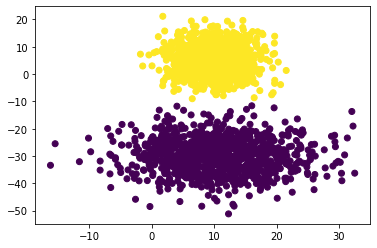

In [16]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [17]:
print("Predicted means : \n", gmm.means_)
print("Real means :", means1, means2)

Predicted means : 
 [[ 10.39272292 -29.87142605]
 [  9.87975525   4.96303345]]
Real means : (10, 5) (10, -30)


In [18]:
print("Predicted means : \n", gmm.covariances_)
print("Real means :", cov1, cov2)

Predicted means : 
 [[[ 5.50779989e+01 -8.59085524e-01]
  [-8.59085524e-01  3.83304537e+01]]

 [[ 1.45145717e+01 -2.21688323e-02]
  [-2.21688323e-02  2.80430111e+01]]]
Real means : [[15, 0], [0, 30]] [[56, 0], [0, 40]]


# 3. Working with text

In [19]:
df = pd.read_csv("./train.csv")
df = df.head(1000)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
def delete_stopwords(str_x):
    words = str_x.split(' ')
    neutral_words = ['people', 'wikipedia', 'one', 'say', 'page', 'know', 'go', 'back', 'take', 'see', 'look', 'article',
                     'edit', 'got', 'thing', 'want', 'make']
    new_words = list()
    for word in words:
        if word not in stopwords.words('english') or word not in neutral_words:
            new_words.append(word)
    return ' '.join(new_words)

# delete all unnecessary symbols
df["comment_text"] = df["comment_text"].map(lambda x: re.sub(r'[^\w]', ' ', x))
# lower all words
df["comment_text"] = df["comment_text"].map(lambda x: x.lower())
# delete all stopwords
df["comment_text"] = df["comment_text"].map(delete_stopwords)

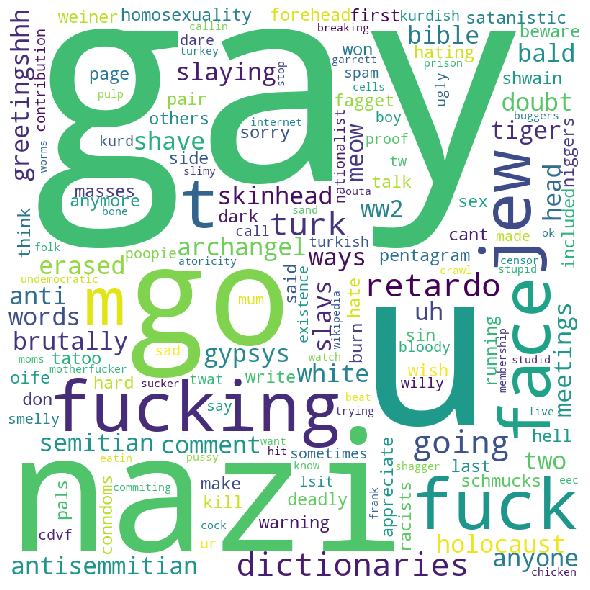

In [21]:
# identity hate class
identity_hate_df = df[df["identity_hate"] == 1]
identity_hate_words = ' '.join(list(identity_hate_df["comment_text"].values))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(identity_hate_words)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

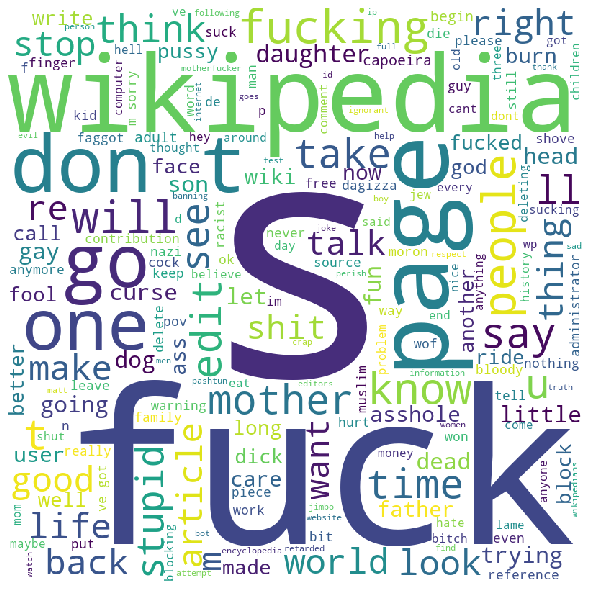

In [22]:
# toxic class
toxic_df = df[df["toxic"] == 1]
toxic_words = ' '.join(list(toxic_df["comment_text"].values))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(toxic_words)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

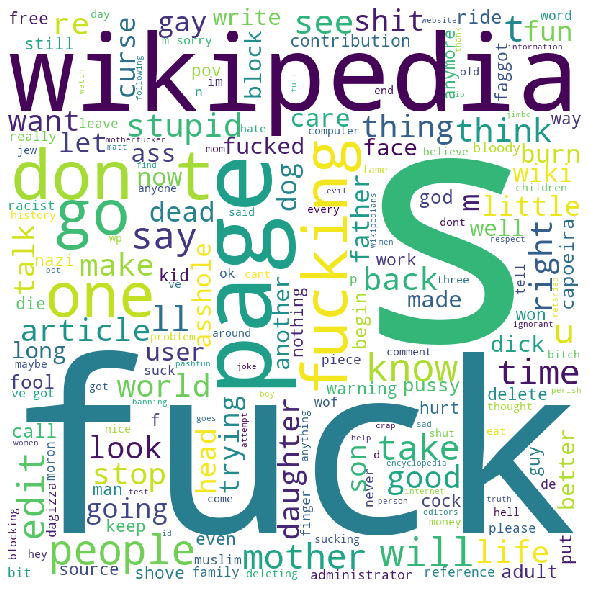

In [23]:
# insult class
insult_df = df[df["insult"] == 1]
insult_words = ' '.join(list(toxic_df["comment_text"].values))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(insult_words)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [24]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["comment_text"].values)
Y = df.iloc[:, 2:].values
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X, Y)
clf.score(X, Y)

0.922